# PR 711 test and baseline comparison 

This jupyter notebook compares the results of PR 711, which fixes an issue discoved while updating the history output variable added in PR 694.  It was found that `fragmentation_scaler` was not being initialized to zero during new patch formation.

- Pull request: https://github.com/NGEET/fates/pull/711

## Import libraries

In [10]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Load history output data

In [78]:
filename_history_fix = 'data/frag-hist-fix-true.nc' # Test data
filename_history_frag = 'data/frag-retest-10year-test.nc' # PR 705 Test data (new baseline)
filename_history_base = 'data/frag-retest-10year-base.nc' # Pre-705 baseline data
data_fix = xr.open_dataset(filename_history_fix)
data_frag = xr.open_dataset(filename_history_frag)
data_base = xr.open_dataset(filename_history_base)

## Select data subsets

Above ground coarse woody debris

In [79]:
litter_cwd_ag_fix  = data_fix.LITTER_CWD_AG_ELEM.sel(fates_levelem=0)
litter_cwd_ag_frag = data_frag.LITTER_CWD_AG_ELEM.sel(fates_levelem=0)
litter_cwd_ag_base = data_base.LITTER_CWD_AG_ELEM.sel(fates_levelem=0)
litter_cwd_ag_diff = litter_cwd_ag_frag - litter_cwd_ag_base
litter_cwd_ag_dfix = litter_cwd_ag_fix - litter_cwd_ag_frag
litter_cwd_ag_bfix = litter_cwd_ag_fix - litter_cwd_ag_base

Below ground coarse woody debris

In [80]:
litter_cwd_bg_fix  = data_fix.LITTER_CWD_BG_ELEM.sel(fates_levelem=0)
litter_cwd_bg_frag = data_frag.LITTER_CWD_BG_ELEM.sel(fates_levelem=0)
litter_cwd_bg_base = data_base.LITTER_CWD_BG_ELEM.sel(fates_levelem=0)
litter_cwd_bg_diff = litter_cwd_bg_frag - litter_cwd_bg_base
litter_cwd_bg_dfix = litter_cwd_bg_fix - litter_cwd_bg_frag
litter_cwd_bg_bfix = litter_cwd_bg_fix - litter_cwd_bg_base

Above ground fines (leaf)

In [81]:
litter_fines_ag_fix  = data_fix.LITTER_FINES_AG_ELEM.sel(fates_levelem=0)
litter_fines_ag_frag = data_frag.LITTER_FINES_AG_ELEM.sel(fates_levelem=0)
litter_fines_ag_base = data_base.LITTER_FINES_AG_ELEM.sel(fates_levelem=0)
litter_fines_ag_diff = litter_fines_ag_frag - litter_fines_ag_base
litter_fines_ag_dfix = litter_fines_ag_fix - litter_fines_ag_frag
litter_fines_ag_bfix = litter_fines_ag_fix - litter_fines_ag_base

Below ground fines (root)

In [82]:
litter_fines_bg_fix = data_fix.LITTER_FINES_BG_ELEM.sel(fates_levelem=0)
litter_fines_bg_frag = data_frag.LITTER_FINES_BG_ELEM.sel(fates_levelem=0)
litter_fines_bg_base = data_base.LITTER_FINES_BG_ELEM.sel(fates_levelem=0)
litter_fines_bg_diff = litter_fines_bg_frag - litter_fines_bg_base
litter_fines_bg_dfix = litter_fines_bg_fix - litter_fines_bg_frag
litter_fines_bg_bfix = litter_fines_bg_fix - litter_fines_bg_base

Fuel intensity

In [83]:
fuel_intensity_fix = data_fix.FIRE_INTENSITY
fuel_intensity_frag = data_frag.FIRE_INTENSITY
fuel_intensity_base = data_base.FIRE_INTENSITY
fuel_intensity_diff = fuel_intensity_frag - fuel_intensity_base
fuel_intensity_dfix = fuel_intensity_fix - fuel_intensity_frag
fuel_intensity_bfix = fuel_intensity_fix - fuel_intensity_base

Fuel surface/volume

In [113]:
fuel_sav_fix = data_fix.FIRE_FUEL_SAV
fuel_sav_frag = data_frag.FIRE_FUEL_SAV
fuel_sav_base = data_base.FIRE_FUEL_SAV
fuel_sav_diff = fuel_sav_frag - fuel_sav_base
fuel_sav_dfix = fuel_sav_fix - fuel_sav_frag
fuel_sav_bfix = fuel_sav_fix - fuel_sav_base

Effective Fuel moisture

In [85]:
fuel_eff_moist_fix = data_fix.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_frag = data_frag.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_base = data_base.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_diff = fuel_eff_moist_frag - fuel_eff_moist_base
fuel_eff_moist_dfix = fuel_eff_moist_fix - fuel_eff_moist_frag
fuel_eff_moist_bfix = fuel_eff_moist_fix - fuel_eff_moist_base

Fuel bulk density

In [86]:
fuel_bulkd_fix = data_fix.FIRE_FUEL_BULKD
fuel_bulkd_frag = data_frag.FIRE_FUEL_BULKD
fuel_bulkd_base = data_base.FIRE_FUEL_BULKD
fuel_bulkd_diff = fuel_bulkd_frag - fuel_bulkd_base
fuel_bulkd_dfix = fuel_bulkd_fix - fuel_bulkd_frag
fuel_bulkd_bfix = fuel_bulkd_fix - fuel_bulkd_base

Fuel moisture (MEF)

In [87]:
fuel_mef_fix = data_fix.FIRE_FUEL_MEF
fuel_mef_frag = data_frag.FIRE_FUEL_MEF
fuel_mef_base = data_base.FIRE_FUEL_MEF
fuel_mef_diff = fuel_mef_frag - fuel_mef_base
fuel_mef_dfix = fuel_mef_fix - fuel_mef_frag
fuel_mef_bfix = fuel_mef_fix - fuel_mef_base

Ground fuel within each patch age bin

In [88]:
# divide this by patch_area_by_age to get fuel per?
sum_fuel_pa_fix = data_fix.SUM_FUEL_BY_PATCH_AGE
sum_fuel_pa_frag = data_frag.SUM_FUEL_BY_PATCH_AGE
sum_fuel_pa_base = data_base.SUM_FUEL_BY_PATCH_AGE
sum_fuel_pa_diff = sum_fuel_pa_frag - sum_fuel_pa_base
sum_fuel_pa_dfix = sum_fuel_pa_fix - sum_fuel_pa_frag
sum_fuel_pa_bfix = sum_fuel_pa_fix - sum_fuel_pa_base

Total ground fuel

In [89]:
sum_fuel_fix = data_fix.SUM_FUEL
sum_fuel_frag = data_frag.SUM_FUEL
sum_fuel_base = data_base.SUM_FUEL
sum_fuel_diff = sum_fuel_frag - sum_fuel_base
sum_fuel_dfix = sum_fuel_fix - sum_fuel_frag
sum_fuel_bfix = sum_fuel_fix - sum_fuel_base

Corrected fire intensity

In [90]:
fire_intensity_corr_fix = data_fix.FIRE_INTENSITY_AREA_PRODUCT / data_fix.FIRE_AREA
fire_intensity_corr_frag = data_frag.FIRE_INTENSITY_AREA_PRODUCT / data_frag.FIRE_AREA
fire_intensity_corr_base = data_base.FIRE_INTENSITY_AREA_PRODUCT / data_base.FIRE_AREA
fire_intensity_corr_diff = fire_intensity_corr_frag - fire_intensity_corr_base
fire_intensity_corr_dfix = fire_intensity_corr_fix - fire_intensity_corr_frag
fire_intensity_corr_bfix = fire_intensity_corr_fix - fire_intensity_corr_base

Fuel moisture (size-resolved)

In [91]:
fuel_moist_fix = data_fix.FUEL_MOISTURE_NFSC
fuel_moist_frag = data_frag.FUEL_MOISTURE_NFSC
fuel_moist_base = data_base.FUEL_MOISTURE_NFSC
fuel_moist_diff = fuel_moist_frag - fuel_moist_base
fuel_moist_dfix = fuel_moist_fix - fuel_moist_frag
fuel_moist_bfix = fuel_moist_fix - fuel_moist_base

## Plot the data

Left plot: PR 711 update difference from original baseline  
Right plot: PR 771 update difference from current master

### Global plots

Above ground coarse woody debris

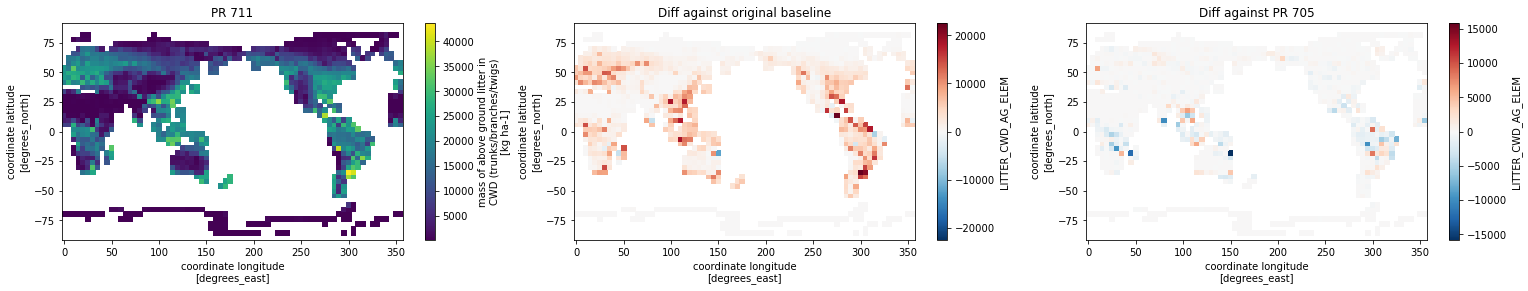

In [115]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
litter_cwd_ag_fix.isel(time=tstop_idx).plot(ax=ax1);
litter_cwd_ag_bfix.isel(time=tstop_idx).plot(ax=ax2);
litter_cwd_ag_dfix.isel(time=tstop_idx).plot(ax=ax3);
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline')
ax3.set_title('Diff against PR 705');

Below ground coarse woody debris

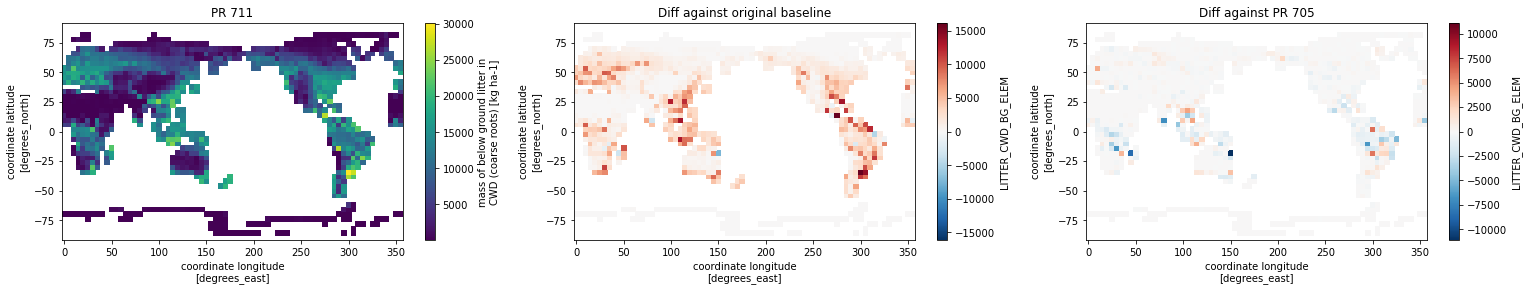

In [117]:
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
litter_cwd_bg_fix.isel(time=tstop_idx).plot(ax=ax1)
litter_cwd_bg_bfix.isel(time=tstop_idx).plot(ax=ax2)
litter_cwd_bg_dfix.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline')
ax3.set_title('Diff against PR 705');

Above ground fines (leaf)

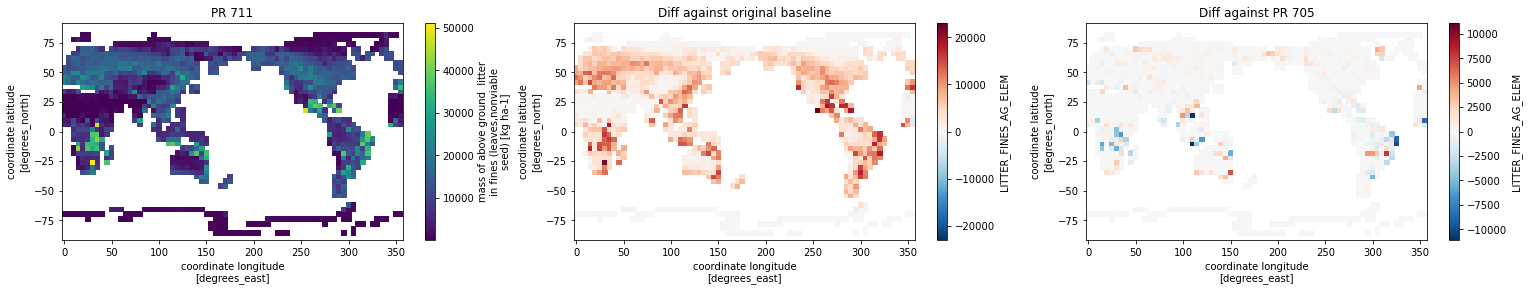

In [118]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
litter_fines_ag_fix.isel(time=tstop_idx).plot(ax=ax1)
litter_fines_ag_bfix.isel(time=tstop_idx).plot(ax=ax2)
litter_fines_ag_dfix.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline');
ax3.set_title('Diff against PR 705');

Below ground fines (root)

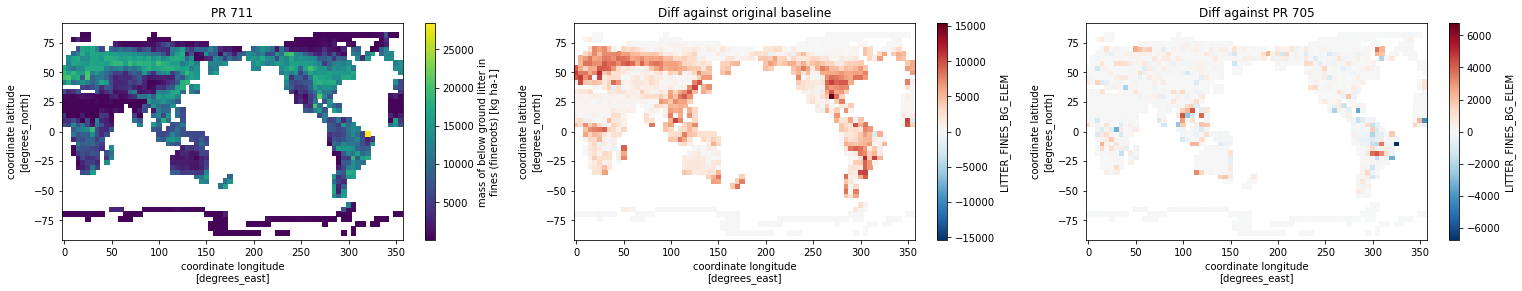

In [119]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
litter_fines_bg_fix.isel(time=tstop_idx).plot(ax=ax1)
litter_fines_bg_bfix.isel(time=tstop_idx).plot(ax=ax2)
litter_fines_bg_dfix.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline');
ax3.set_title('Diff against PR 705');

Fuel intensity

Text(0.5, 1.0, 'Diff against PR 705')

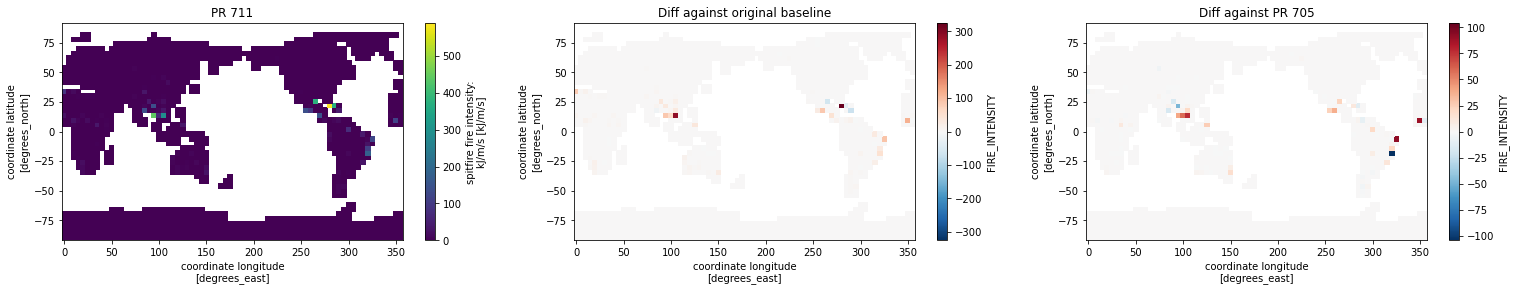

In [120]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fuel_intensity_fix.isel(time=tstop_idx).plot(ax=ax1)
fuel_intensity_bfix.isel(time=tstop_idx).plot(ax=ax2)
fuel_intensity_dfix.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline')
ax3.set_title('Diff against PR 705')

Fuel surface/volume

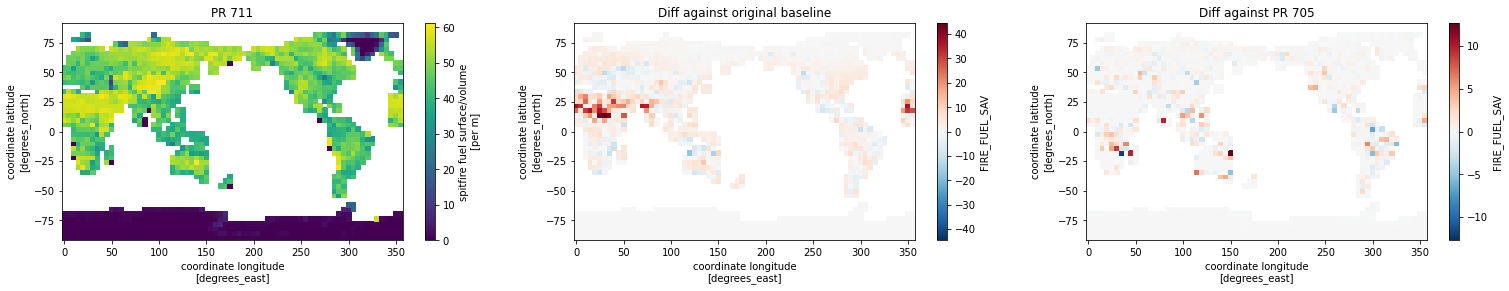

In [121]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fuel_sav_fix.isel(time=tstop_idx).plot(ax=ax1)
fuel_sav_bfix.isel(time=tstop_idx).plot(ax=ax2)
fuel_sav_dfix.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline')
ax3.set_title('Diff against PR 705');

Effective Fuel moisture

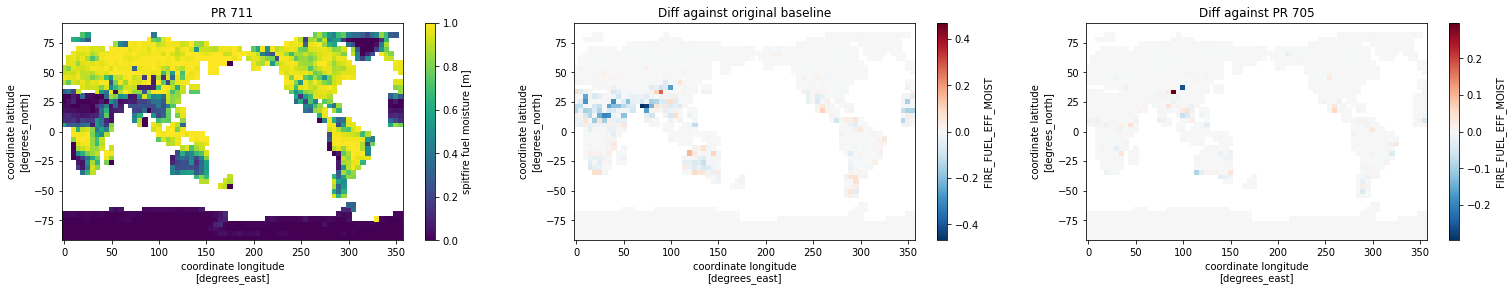

In [122]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fuel_eff_moist_fix.isel(time=tstop_idx).plot(ax=ax1)
fuel_eff_moist_bfix.isel(time=tstop_idx).plot(ax=ax2)
fuel_eff_moist_dfix.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline')
ax3.set_title('Diff against PR 705');

Fuel bulk density

Text(0.5, 1.0, 'Diff against PR 705')

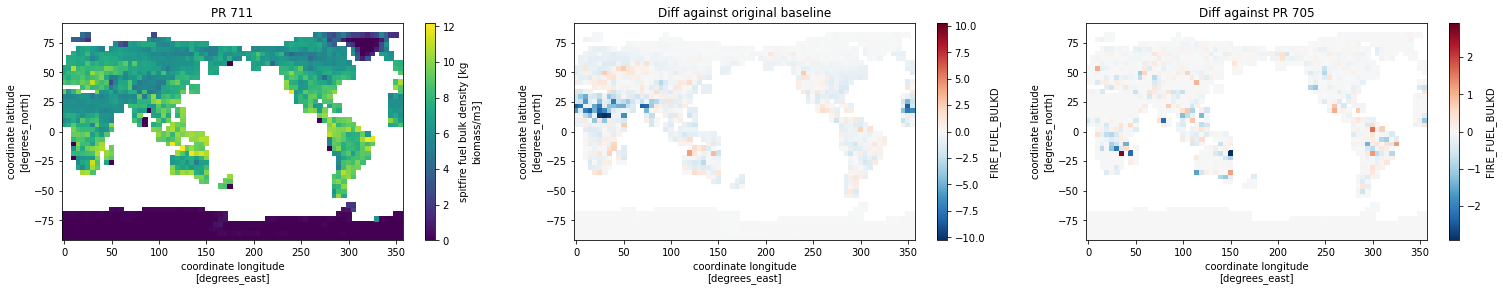

In [123]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fuel_bulkd_fix.isel(time=tstop_idx).plot(ax=ax1)
fuel_bulkd_bfix.isel(time=tstop_idx).plot(ax=ax2)
fuel_bulkd_dfix.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline')
ax3.set_title('Diff against PR 705')

Fuel moisture (MEF)

Text(0.5, 1.0, 'Diff against PR 705')

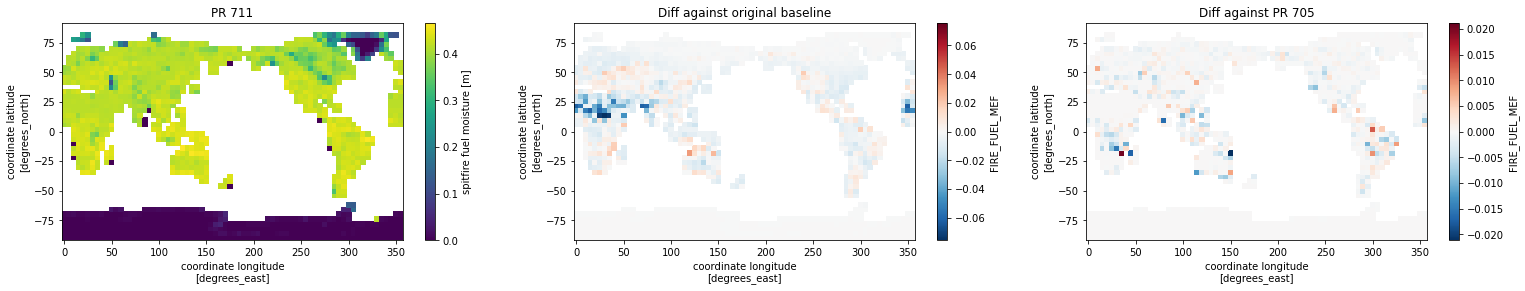

In [124]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fuel_mef_fix.isel(time=tstop_idx).plot(ax=ax1)
fuel_mef_bfix.isel(time=tstop_idx).plot(ax=ax2)
fuel_mef_dfix.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline')
ax3.set_title('Diff against PR 705')

Ground fuel within each patch age bin

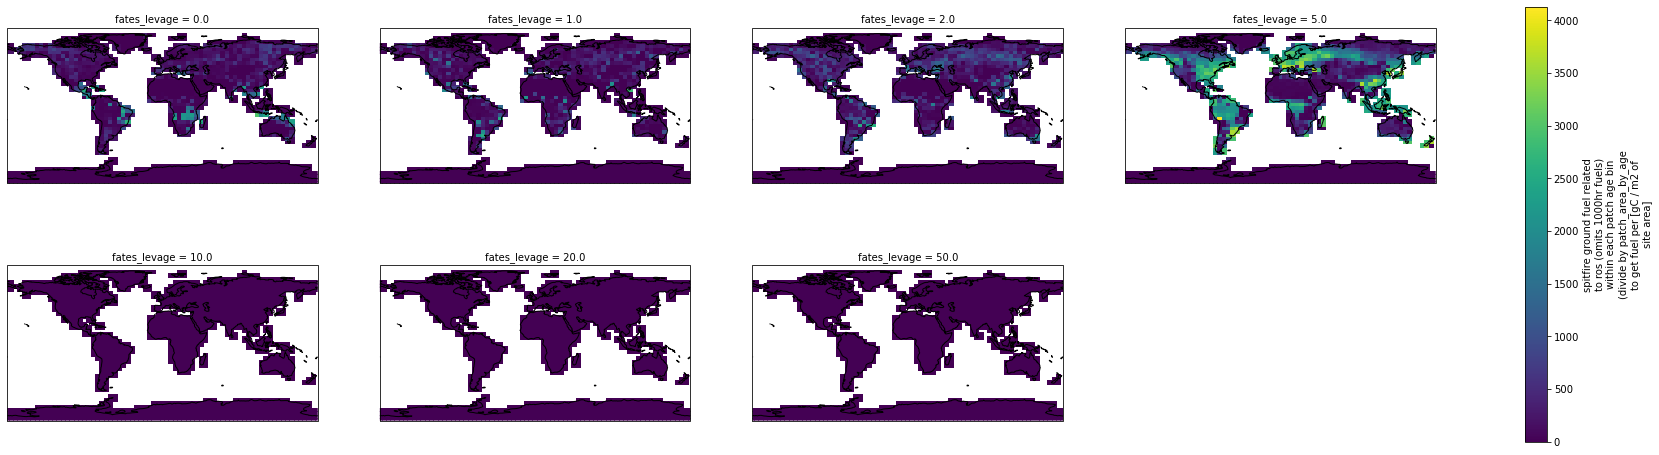

In [125]:
tstop_idx = 119
fg = sum_fuel_pa_fix.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levage', col_wrap = 4, figsize=(32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

Ground fuel within each patch age bin (diff against original baseline)

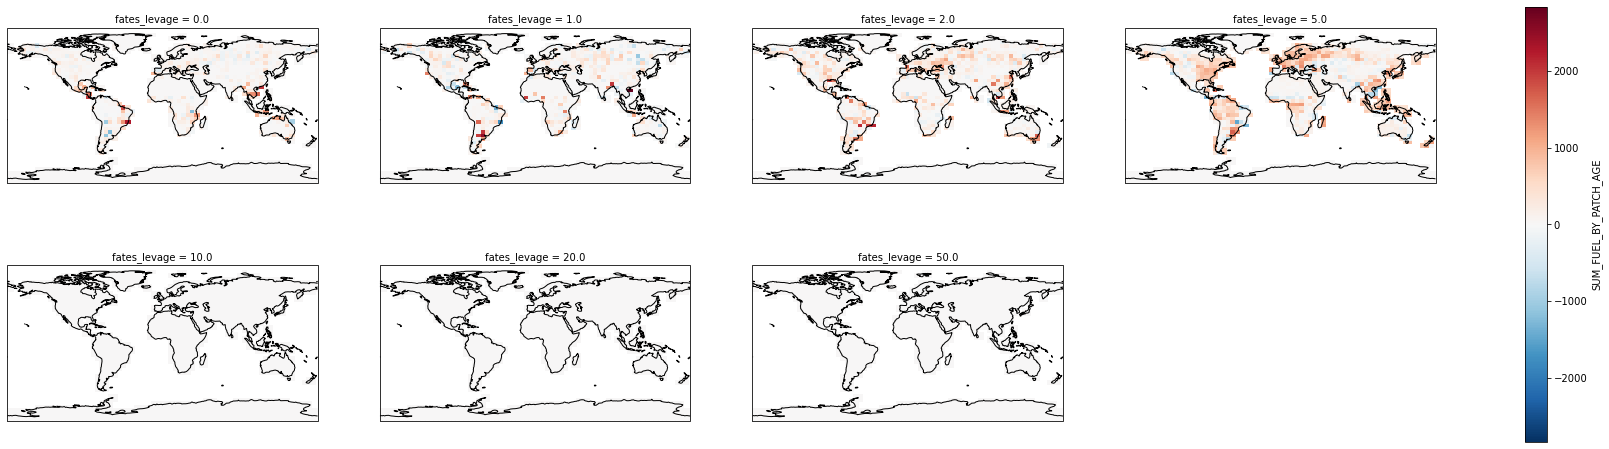

In [126]:
tstop_idx = 119
fg = sum_fuel_pa_bfix.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levage', col_wrap = 4, figsize=(32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

Ground fuel within each patch age bin (diff against PR 705)

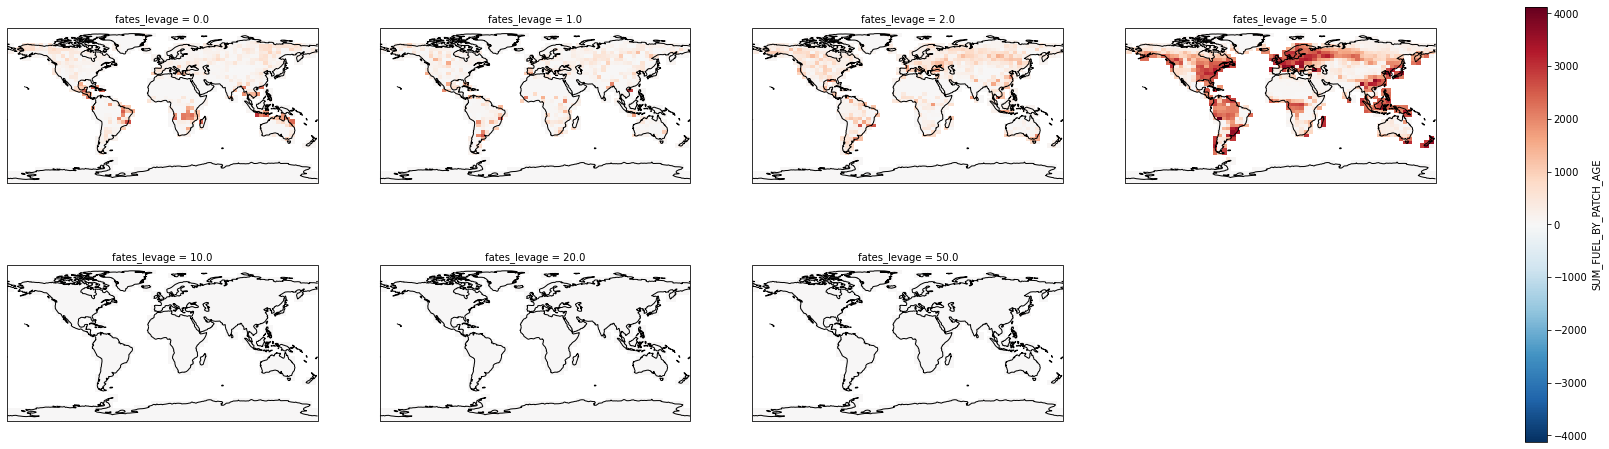

In [127]:
tstop_idx = 119
fg = sum_fuel_pa_dfix.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levage', col_wrap = 4, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

Total ground fuel

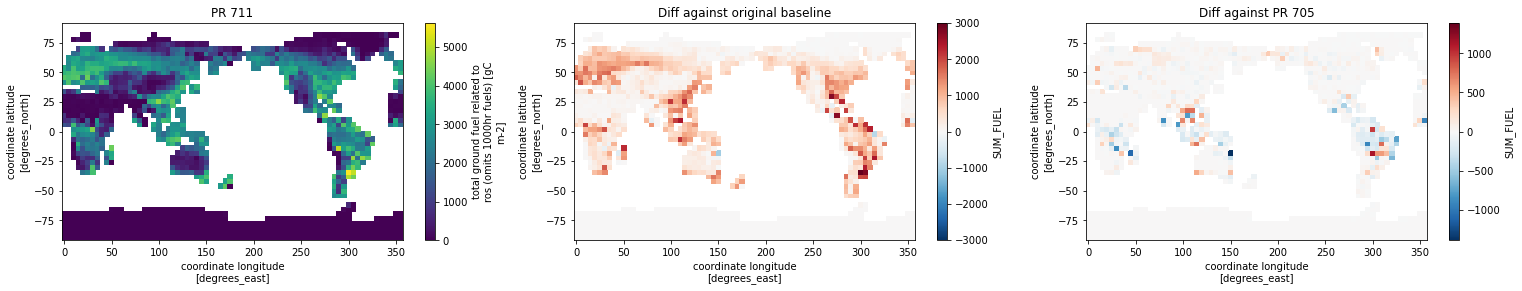

In [128]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
sum_fuel_fix.isel(time=tstop_idx).plot(ax=ax1)
sum_fuel_bfix.isel(time=tstop_idx).plot(ax=ax2)
sum_fuel_dfix.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline')
ax3.set_title('Diff against PR 705');

Corrected fire intensity

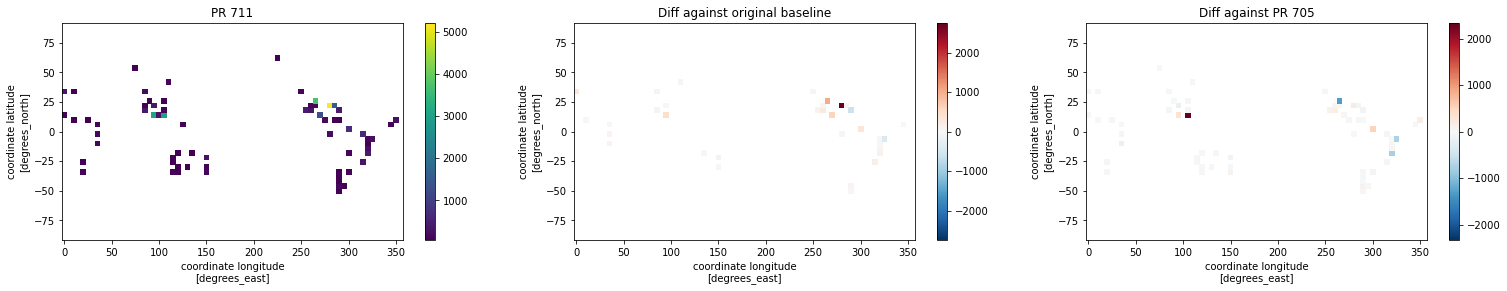

In [129]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fire_intensity_corr_fix.isel(time=tstop_idx).plot(ax=ax1)
fire_intensity_corr_bfix.isel(time=tstop_idx).plot(ax=ax2)
fire_intensity_corr_dfix.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('PR 711');
ax2.set_title('Diff against original baseline')
ax3.set_title('Diff against PR 705');

Fuel moisture

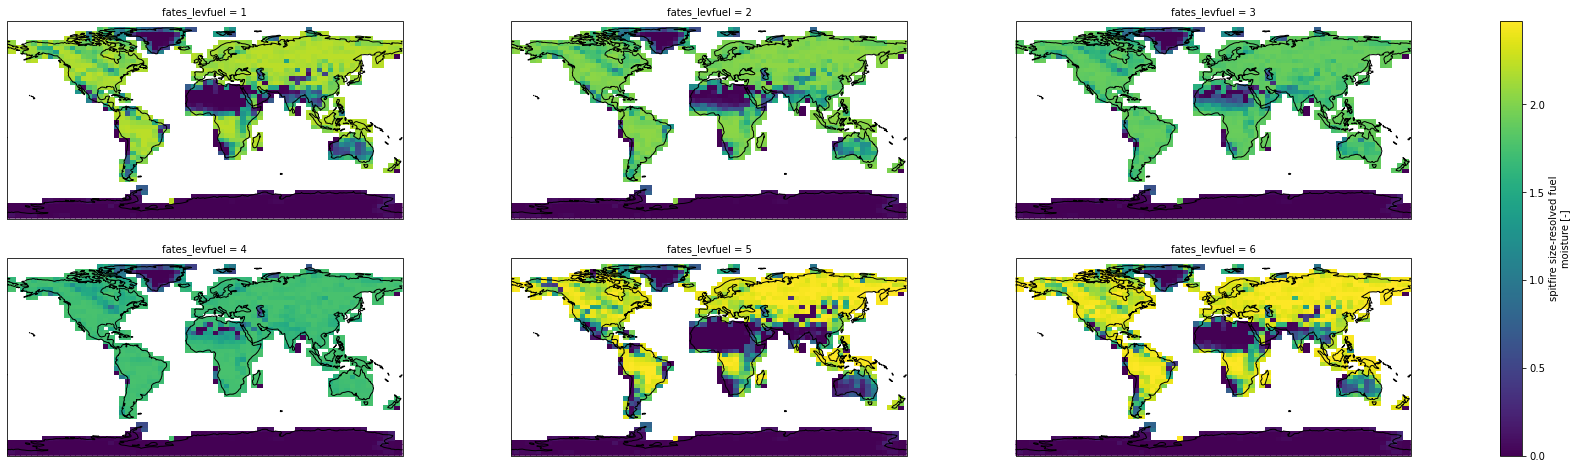

In [130]:
tstop_idx = 119
fg = fuel_moist_fix.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levfuel', col_wrap = 3, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

Fuel moisture (diff against PR 705)

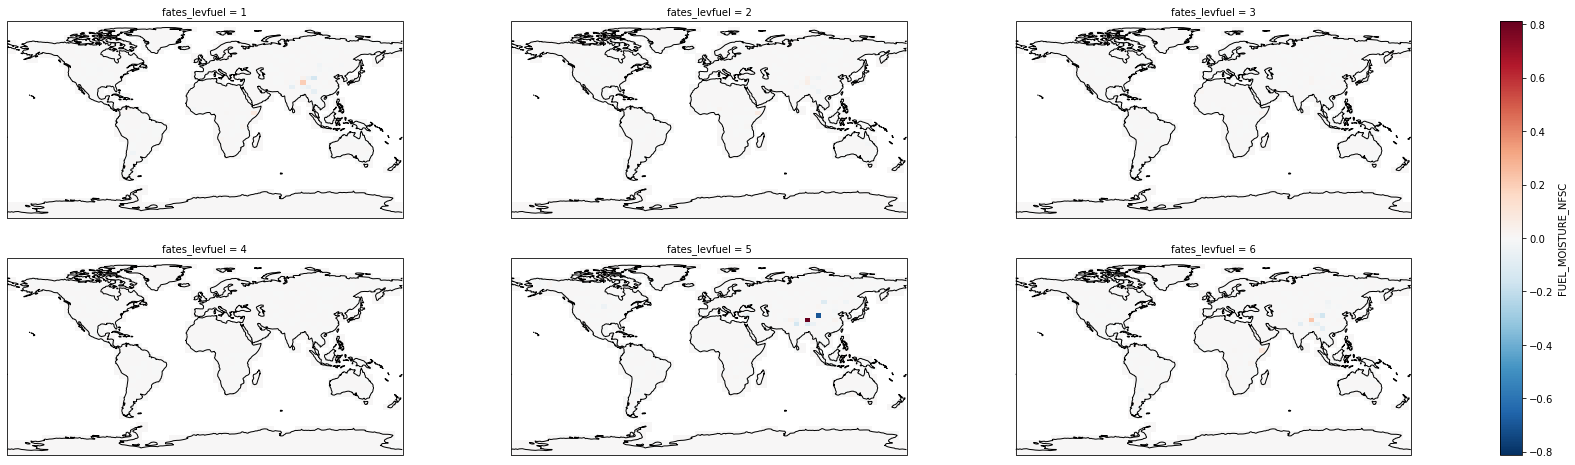

In [131]:
tstop_idx = 119
fg = fuel_moist_bfix.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levfuel', col_wrap = 3, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

Fuel moisture (diff against PR 705)

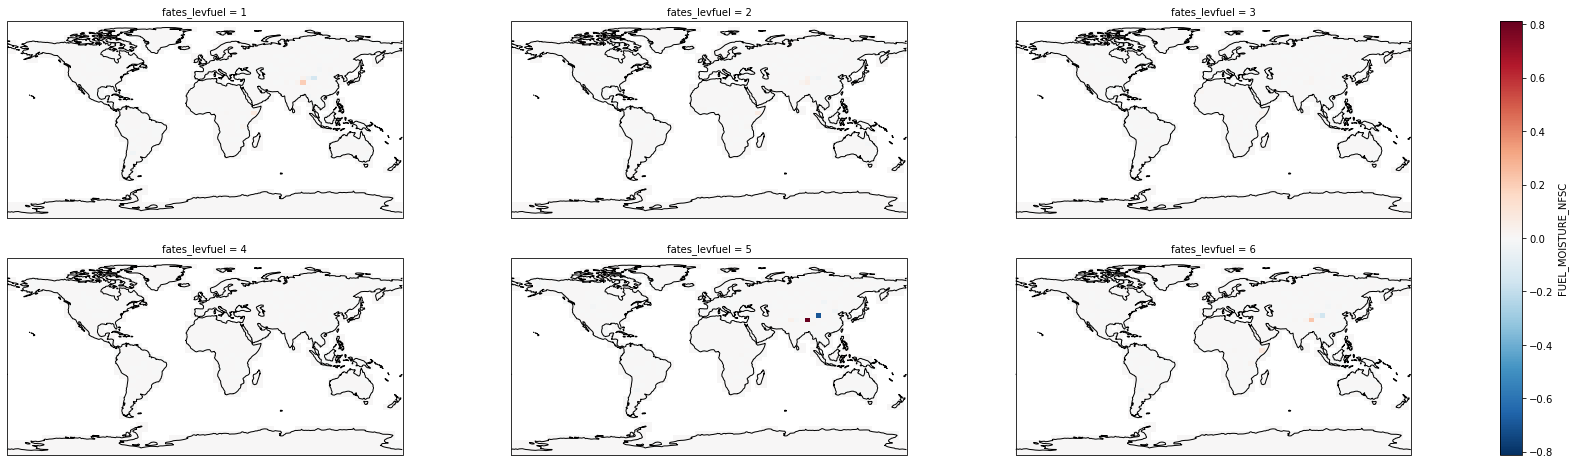

In [132]:
tstop_idx = 119
fg = fuel_moist_dfix.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levfuel', col_wrap = 3, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()
#     ax.gridlines(draw_labels=True)